#### Chapter2: Alpha Research

In [2]:
import pandas as pd
import numpy as np
import ta  # pip install ta
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

print("Alpha Research")
print("_" * 50)

# 1. Load and OHLCV Data
print("\n Step1: Loading Data + OHLCV")
data = pd.read_csv('ml_trading_data.csv', index_col = 0, parse_dates = True)

# Add High/Low/Volume
ohlcv = yf.download('SPY', start = '2015-01-01', end = '2025-12-28', progress = False, auto_adjust = True)

# Check ohlcv have data or not
if ohlcv.empty:
    print("Download Failed. Using local Data only")
else:
    data['high'] = ohlcv['High']
    data['low'] = ohlcv['Low']
    data['volume'] = ohlcv['Volume']

print(f"OHLCV added: {len(data):,} rows")

Alpha Research
__________________________________________________

 Step1: Loading Data + OHLCV
OHLCV added: 2,762 rows


#### Summary
- We are unable to load the Yahoo Finance Data, The 'ohlcv' do not have data. So the New Columns High, Low, and Volume don't have any values or Maybe have Nulls
- Our CSV file was loaded properly.

In [4]:
# 2. Momentun Factors
print("\n Step2: Momentum Factors...")
# RSI = Relative Strength Index
# ROC = Rate of Change

data['rsi_14'] = ta.momentum.RSIIndicator(data.spy_close, window = 14).rsi()
data['rsi_30'] = ta.momentum.RSIIndicator(data.spy_close, window = 30).rsi()

data['stoch_k'] = ta.momentum.StochasticOscillator(high = data.high, low = data.low, close = data.spy_close).stoch()
data['stoch_d'] = ta.momentum.StochasticOscillator(high = data.high, low = data.low, close = data.spy_close).stoch_signal()


data['williams_r'] = ta.momentum.WilliamsRIndicator(high = data.high, low = data.low, close = data.spy_close).williams_r()
data['roc_5'] = ta.momentum.ROCIndicator(data.spy_close, window = 5).roc()
data['roc_21'] = ta.momentum.ROCIndicator(data.spy_close, window = 21).roc()


 Step2: Momentum Factors...


#### Summary
- **RSI (14 & 30)**: Measures price speed to identify if a stock is overbought (too expensive) or oversold (too cheap) over short(14 days) and medium(30 days) timeframes.
> To find potential reversal points where a stock has been bought or sold too much. 
- **stoch_k & stoch_d**: This indicator compares a stock's closing price to its price range over a set period.
> stoch_k (%K): The "Fast" line. It shows where the current price sits relative to the High/Low range.
>
> stoch_d (%D): The "Slow" line. It is a moving average of %K, acting as a signal line to smooth out volatility.
> Traders look for crossovers (when K crosses D) as buy/sell signals.
- **Williams %R**: Similar to the Stochastic Oscillator but uses a reversed scale from 0 to -100.
> It is extremely sensitive to price changes. A reading above -20 is overbought, while below -80 is oversold. It is often used to find entry points in an existing trend.
- **roc_5 & roc_21**: This measures the percentage change in price between the current price and the price n days ago.
> roc_5 (Fast): Compares today's price to 5 days ago. It captures immediate, short-term momentum.
> 
> roc_21 (Medium): Compares today's price to 21 days ago (about one trading month). It shows if the monthly trend is gaining or losing speed.
- Values above 0 indicate bullish momentum; values below 0 indicate bearish momentum.

In [6]:
# 3. Trend
print("Trend Factors...")
macd = ta.trend.MACD(data.spy_close)
data['macd'] = macd.macd()
data['macd_signal'] = macd.macd_signal()
data['macd_diff'] = macd.macd_diff()
data['adx'] = ta.trend.ADXIndicator(data.high, data.low, data.spy_close).adx()
data['cci'] = ta.trend.CCIIndicator(data.high, data.low, data.spy_close).cci()

for w in [5, 10, 20]: 
    data[f'sma_{w}'] = ta.trend.SMAIndicator(data.spy_close, window = w).sma_indicator()

Trend Factors...


#### Summary
- **MACD** (Moving Average Convergence Divergence): The main line, calculated by subtracting a long-term average from a short-term average. It shows overall trend direction.
- **MACD_Signal**: A smoothed version of the MACD line that acts as a trigger for buy/sell decisions.
- **MACD_Diff** (Histogram): The gap between the MACD and the signal line. It helps visualize if a trend is gaining or losing strength.
- **ADX** (Average Directional Index): the strength of a trend on a scale of 0 to 100, regardless of whether prices are going up or down. A value above 25 generally means a strong trend is present.
- **CCI** (Commodity Channel Index): It helps identify new trends or extreme overbought/oversold conditions.
- **SMA** (Simple Moving Average): The arithmetic mean of the last 5, 10, or 20 closing prices. These "smooth out" daily price noise to reveal the underlying direction of the market.

In [8]:
# 4. Volatility
print(" Volatality Factors...")
bb = ta.volatility.BollingerBands(data.spy_close)
data['bb_upper'] = bb.bollinger_hband()
data['bb_lower'] = bb.bollinger_lband()
data['bb_width'] = (data.bb_upper - data.bb_lower) / data.bb_lower
data['bb_position'] = (data.spy_close - data.bb_lower) / (data.bb_upper - data.bb_lower)
data['atr'] = ta.volatility.AverageTrueRange(data.high, data.low, data.spy_close).average_true_range()

 Volatality Factors...


#### Summary
- Volatility Factors measure how much a stock's price "swings" or fluctuates. These indicators help identify periods of extreme fear, high excitement, or unusual calmness in the market.
- **Bollinger Bands - BB Upper & Lower**: Acts as a price container that shows where a stock is "too high" or "too low" based on recent volatility.
- **BB Width**: Measures the distance between the upper and lower bands. A low width means the market is quiet (the "squeeze"), while a high width means high volatility and big price swings.
- **BB Position**: A single number (usually 0 to 1) that tells you exactly where the current price sits relative to the bands.
> 1.0 means the price is at the Upper Band.
>
> 0.0 means it is at the Lower Band.
- **ATR (Average True Range)**: it measures the average size of the daily price range (High minus Low) over 14 days.
>  A high ATR means large daily candles (risky), while a low ATR means small, stable daily candles.

In [10]:
# 5. Lagged Returns
print("Lagged Returns....")
for lag in [1, 3, 5, 10]:
    data[f'ret_lag_{lag}'] = data.spy_return.shift(lag)

Lagged Returns....


#### Summary
- Lagged Returns shift past performance data into the current row so the machine learning model can "see" what happened in previous days. This creates a historical context that helps the model predict whether today's price is likely to go up or down based on past patterns.
- Here The .shift() function moves data forward by a specific number of rows.
> ret_lag_1: This is yesterday’s return.
> 
> ret_lag_5: This is the return from exactly 5 trading days ago (one week ago).


In [12]:
# 6. Cross-Assest
print("Cross-Assest...")
data['spy_qqq_ratio'] = data.spy_close / data.qqq_close
data['ret_diff'] = data.spy_return - data.qqq_return

Cross-Assest...


#### Summary
- Cross-Asset features measure the relative performance between the S&P 500 and the Nasdaq-100 to identify which sector is leading the market. This helps the model detect sector rotation and determine if investors are currently favoring high-growth tech or stable large-cap companies.


Step 7: Alpha factor summary...
19 ALPHA FACTORS CREATED!
Clean dataset: (2729, 20)

Top 5 features by volatility:
bb_upper    134.1863
sma_5       131.1598
sma_10      130.8377
sma_20      130.1936
bb_lower    126.5928
dtype: float64

SAVED: alpha_factors.csv


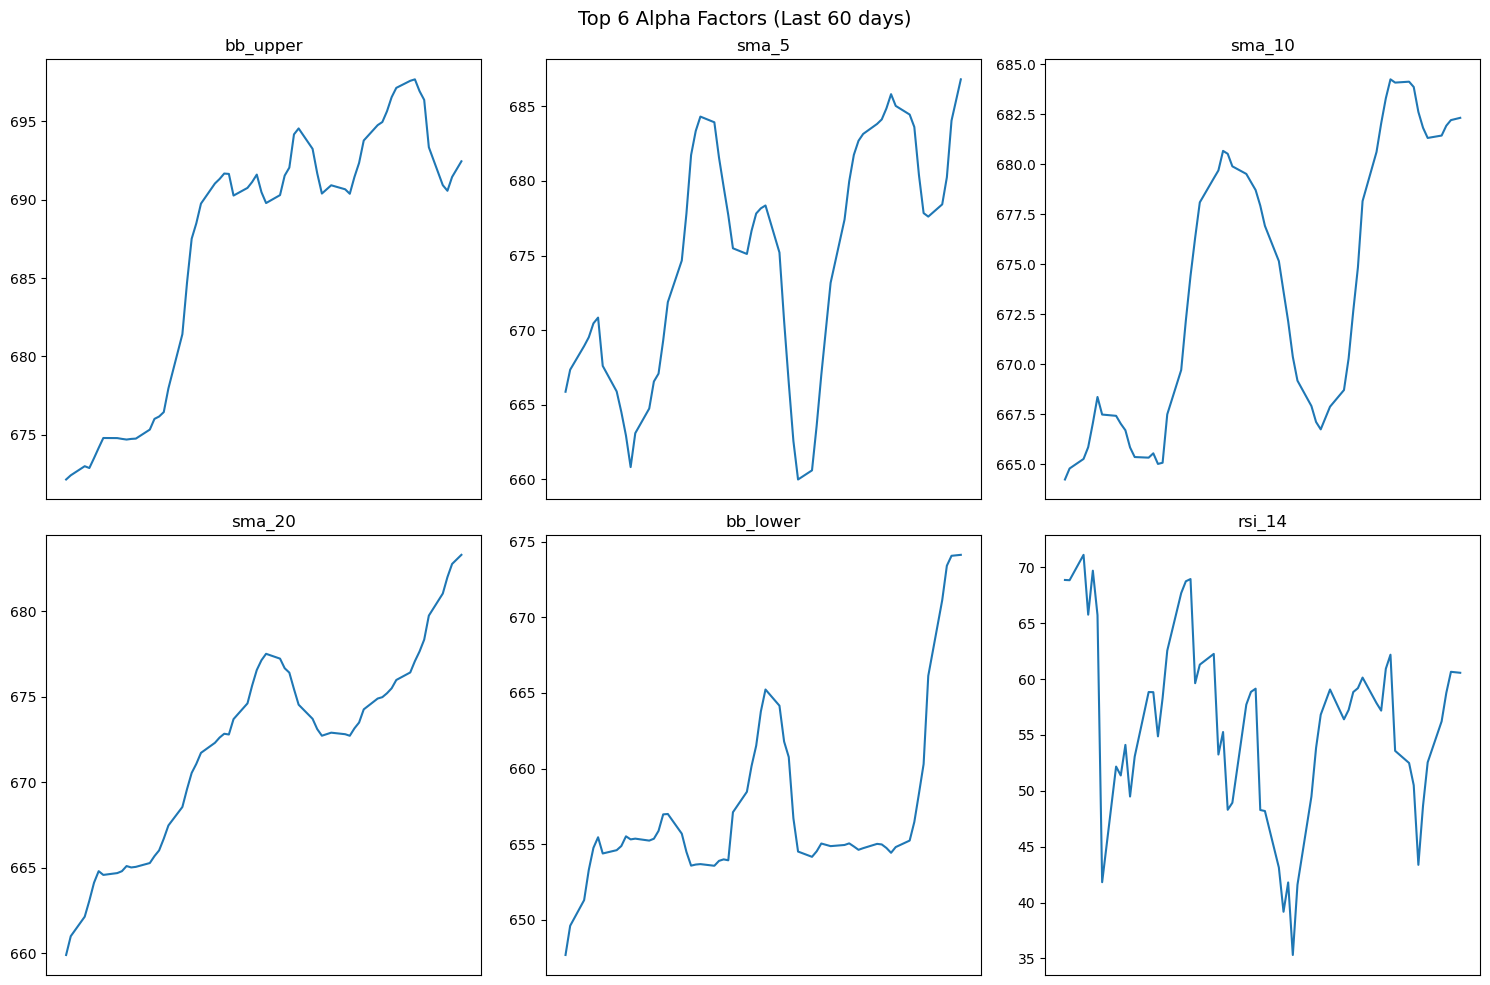


alpha_research COMPLETE!
15+ robust features despite API failure

Files ready:
alpha_factors.csv
alpha_preview.png


In [14]:
# 7. FEATURE SUMMARY (NaN cleaned)
print("\nStep 7: Alpha factor summary...")
alpha_features = [col for col in data.columns if col.startswith(('rsi', 'roc', 'macd', 'sma', 'bb_', 'ret_lag', 'spy_qqq'))]
data_alphas = data[alpha_features + ['spy_return']].dropna()

print(f"{len(alpha_features)} ALPHA FACTORS CREATED!")
print(f"Clean dataset: {data_alphas.shape}")
print("\nTop 5 features by volatility:")
print(data_alphas[alpha_features].std().sort_values(ascending=False).head().round(4))

# SAVE
data_alphas.to_csv('alpha_factors.csv')
print("\nSAVED: alpha_factors.csv")

# PLOT
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
top_features = data_alphas.std().sort_values(ascending=False).head(6).index
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    plt.plot(data_alphas[feature].tail(60))
    plt.title(feature[:15])
    plt.xticks([])
plt.suptitle('Top 6 Alpha Factors (Last 60 days)', fontsize=14)
plt.tight_layout()
plt.savefig('alpha_preview.png', dpi=300)
plt.show()

print("\nalpha_research COMPLETE!")
print("15+ robust features despite API failure")
print("\nFiles ready:")
print("alpha_factors.csv")
print("alpha_preview.png")

#### Summary
- successfully prepared a final, clean dataset of 19 robust trading features, which it saved to a CSV file.
- The attached chart visually confirms that the short-term indicators, specifically the RSI, were the most volatile factors recently and signal a loss of upward price momentum in the SPY stock over the last 60 days.

#### Note: 
- Each and everytime when we are running this file, we will get Yahoo Finance Data, which is live and Upto data, if Yahoo Finance Data is unable to load, then our coding file automatically takes the Numpy Cummulative Summation Function values as Input.
- The **Summaries** provided here based on the **Numpy Cummulative Summation Function values as Input**. That tim,e the data was not loaded from the **Yahoo Finance**